In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from IPython.display import display, Image
import graphviz
import sys

# Data Preparation

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df.groupby('label').size()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64

In [5]:
#split features and targets 
X = df.drop(['label'], axis=1)
Y = df['label']

#Spliting data into training, testing set 
np.random.seed(0)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.5, stratify =Y, random_state=999)

# User Defined Helper Functions

In [6]:
def plot_learning_curve(train_sizes, train_scores, valid_scores, 
                        score, title="Learning Curve"):
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, valid_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color="#DDDDDD")

    # Create plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel(score), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [7]:
def plot_single_parameter_search_curve(params, train_mean, valid_mean, train_std, valid_std, 
                                       param_name, score, title='Hyper Parameter Tuning'):
    # Draw lines
    plt.plot(params, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(params, valid_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(params, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(params, valid_mean - valid_std, valid_mean + valid_std, color="#DDDDDD")

    # Create plot
    plt.title(title)
    plt.xlabel(param_name), plt.ylabel(score), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Algorithm Implementation

## 1. Decision Tree

### 1.1 No pruning

In [8]:
# Create a classifier instance 
dt = DecisionTreeClassifier()

In [11]:
# Train the model, select model based on cross-validation performance
scores_dt = cross_validate(dt, Xtrain, Ytrain, scoring= ['f1_macro'],
                           cv=5, return_train_score=True)

print("Validate F1 macro: %0.2f (+/- %0.2f)" % (scores_dt['test_f1_macro'].mean(), scores_dt['test_f1_macro'].std() * 2)) 
print("Train F1 macro: %0.2f (+/- %0.2f)" % (scores_dt['train_f1_macro'].mean(), scores_dt['train_f1_macro'].std() * 2)) 

Validate F1 macro: 0.83 (+/- 0.01)
Train F1 macro: 1.00 (+/- 0.00)


### 1.2 Pre-pruning

In [12]:
# available hyper parameters 
dt.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

#### 1.2.1 Max depth

In [13]:
# Set the parameters searching space
param_grid = [{'max_depth': range(1, 25, 3)}]
tuned_dt = GridSearchCV(dt, param_grid, cv=5,
                        scoring= ['f1_macro'], refit='f1_macro', 
                        return_train_score=True)
tuned_dt.fit(Xtrain, Ytrain)

/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': range(1, 25, 3)}],
       pre_dispatch='2*n_jobs', refit='f1_macro', return_train_score=True,
       scoring=['f1_macro'], verbose=0)

In [14]:
tuned_dt.best_params_

{'max_depth': 19}

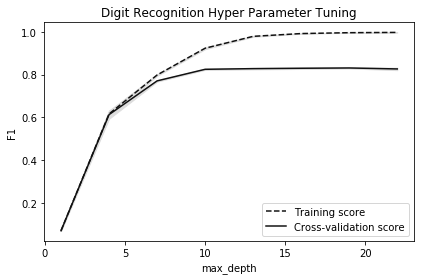

In [17]:
plot_single_parameter_search_curve(range(1, 25, 3),
                                   tuned_dt.cv_results_['mean_train_f1_macro'], 
                                   tuned_dt.cv_results_['mean_test_f1_macro'], 
                                   tuned_dt.cv_results_['std_train_f1_macro'], 
                                   tuned_dt.cv_results_['std_test_f1_macro'], 
                                   'max_depth', 
                                   'F1', 
                                   'Digit Recognition Hyper Parameter Tuning')

#### 1.2.2 min_samples_leaf

In [18]:
# Set the parameters searching space
param_grid = [{'min_samples_leaf': range(1, 100, 5)}]

# Search parameters with cross-validation
dt = DecisionTreeClassifier()
tuned_dt = GridSearchCV(dt, param_grid, cv=5,
                        scoring= ['f1_macro'], refit='f1_macro', 
                        return_train_score=True)
tuned_dt.fit(Xtrain, Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_samples_leaf': range(1, 100, 5)}],
       pre_dispatch='2*n_jobs', refit='f1_macro', return_train_score=True,
       scoring=['f1_macro'], verbose=0)

In [19]:
tuned_dt.best_params_

{'min_samples_leaf': 6}

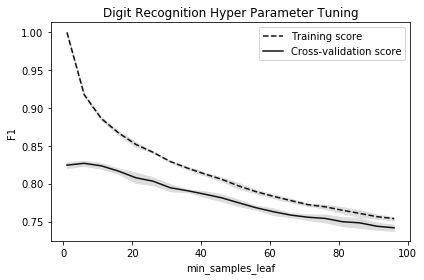

In [20]:
# Plot performance of different parameters
plot_single_parameter_search_curve(range(1, 100, 5),
                                   tuned_dt.cv_results_['mean_train_f1_macro'], 
                                   tuned_dt.cv_results_['mean_test_f1_macro'], 
                                   tuned_dt.cv_results_['std_train_f1_macro'], 
                                   tuned_dt.cv_results_['std_test_f1_macro'], 
                                   'min_samples_leaf', 
                                   'F1', 
                                   'Digit Recognition Hyper Parameter Tuning')

#### 1.2.3 min_impurity_decrease

In [32]:
# Set the parameters searching space
param_grid = [{'min_impurity_decrease': np.linspace(0.0, 0.05, 20)}]

# Search parameters with cross-validation
dt = DecisionTreeClassifier()
tuned_dt = GridSearchCV(dt, param_grid, cv=5,
                        scoring= ['f1_macro'], refit='f1_macro', 
                        return_train_score=True)
tuned_dt.fit(Xtrain, Ytrain)

/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/

/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/

/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/

/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/

/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/

/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/anaconda/anaconda/

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'min_impurity_decrease': array([0.     , 0.00263, 0.00526, 0.00789, 0.01053, 0.01316, 0.01579,
       0.01842, 0.02105, 0.02368, 0.02632, 0.02895, 0.03158, 0.03421,
       0.03684, 0.03947, 0.04211, 0.04474, 0.04737, 0.05   ])}],
       pre_dispatch='2*n_jobs', refit='f1_macro', return_train_score=True,
       scoring=['f1_macro'], verbose=0)

In [33]:
tuned_dt.best_params_

{'min_impurity_decrease': 0.0}

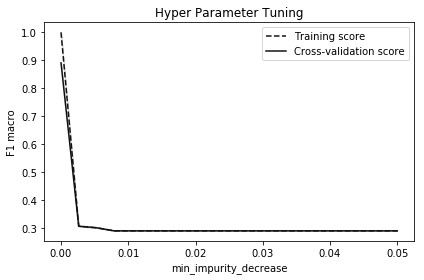

In [34]:
# Plot performance of different parameters
plot_single_parameter_search_curve(np.linspace(0.0, 0.05, 20),
                                   tuned_dt.cv_results_['mean_train_f1_macro'], 
                                   tuned_dt.cv_results_['mean_test_f1_macro'], 
                                   tuned_dt.cv_results_['std_train_f1_macro'], 
                                   tuned_dt.cv_results_['std_test_f1_macro'], 
                                   'min_impurity_decrease', 
                                   'F1 macro', 
                                   'Hyper Parameter Tuning')

#### 1.2.4 search across all hyper parameters for the best set 

### Post-pruning

### Learning Curve

In [ ]:
# Create classifier of the best set of hyper parameters
dt = DecisionTreeClassifier(max_depth = 20, min_samples_leaf=1, min_impurity_decrease=0.0)
# learning curve
train_sizes, train_scores, valid_scores = learning_curve(dt, Xtrain, Ytrain, scoring='f1_macro', train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plot_learning_curve(train_sizes, train_scores, valid_scores, "F1 macro", title="Decision Tree Learning Curve")

## 2. K-NN

### 2.1 Selection of K 

In [ ]:
# Create a classifier instance
neigh = KNeighborsClassifier()

# Set the parameters searching space
param_grid = [{'n_neighbors': range(1, 22, 3)}]

# Search parameters with cross-validation
tuned_neigh = GridSearchCV(neigh, param_grid, cv=5,
                           scoring= ['f1_macro'], refit='f1_macro', 
                           return_train_score=True, verbose=50, n_jobs=-1)
tuned_neigh.fit(Xtrain, Ytrain)

print(tuned_neigh.best_params_)

# Plot performance of different parameters
plot_single_parameter_search_curve(range(1, 22, 3),
                                   tuned_neigh.cv_results_['mean_train_f1_macro'], 
                                   tuned_neigh.cv_results_['mean_test_f1_macro'], 
                                   tuned_neigh.cv_results_['std_train_f1_macro'], 
                                   tuned_neigh.cv_results_['std_test_f1_macro'], 
                                   'n_neighbors', 
                                   'F1', 
                                   'Digit Recognition Hyper Parameter Tuning')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


### Learning Curve

In [42]:
# Create classifier of the best set of hyper parameters
neigh = KNeighborsClassifier(n_neighbors = 7)

# learning curve
train_sizes, train_scores, valid_scores = learning_curve(neigh, Xtrain, Ytrain, scoring='f1_macro', train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
plot_learning_curve(train_sizes, train_scores, valid_scores, "F1 macro", title="KNN Learning Curve")

## Gradient Boosting

In [21]:
# Create a classifier instance
grd = GradientBoostingClassifier()
# available hyper parameters 
grd.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [23]:
# Set the parameters searching space
param_grid = [{'n_estimators': range(1, 201, 5)}]

# Search parameters with cross-validation
tuned_grd = GridSearchCV(grd, param_grid, cv=5,
                           scoring= ['f1_macro'], refit='f1_macro', 
                           return_train_score=True)
tuned_grd.fit(Xtrain, Ytrain)

print(tuned_grd.best_params_)


KeyboardInterrupt: 

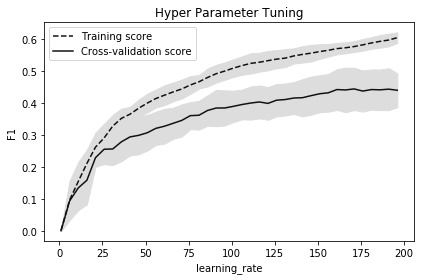

In [29]:
# Plot performance of different parameters
plot_single_parameter_search_curve(range(1, 201, 5),
                                   tuned_grd.cv_results_['mean_train_f1'], 
                                   tuned_grd.cv_results_['mean_test_f1'], 
                                   tuned_grd.cv_results_['std_train_f1'], 
                                   tuned_grd.cv_results_['std_test_f1'], 
                                   'n_estimators', 
                                   'F1', 
                                   'Hyper Parameter Tuning')

In [ ]:
# Set the parameters searching space
param_grid = [{'learning_rate': np.linspace(0.1, 3.0, 2)}]

# Search parameters with cross-validation
tuned_grd = GridSearchCV(grd, param_grid, cv=5,
                           scoring= ['f1_macro'], refit='f1_macro', 
                           return_train_score=True)
tuned_grd.fit(Xtrain, Ytrain)

print(tuned_grd.best_params_)

# Plot performance of different parameters
plot_single_parameter_search_curve(np.linspace(0.1, 3.0, 10),
                                   tuned_grd.cv_results_['mean_train_f1_macro'], 
                                   tuned_grd.cv_results_['mean_test_f1_macro'], 
                                   tuned_grd.cv_results_['std_train_f1_macro'], 
                                   tuned_grd.cv_results_['std_test_f1_macro'], 
                                   'learning_rate', 
                                   'F1 macro', 
                                   'Hyper Parameter Tuning')

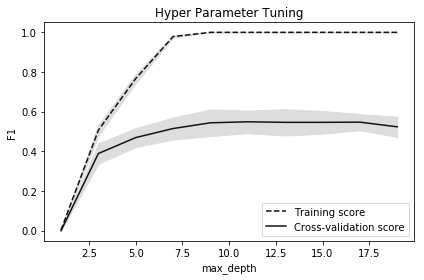

In [43]:
# Set the parameters searching space
param_grid = [{'max_depth': range(1, 20, 2)}]

# Search parameters with cross-validation
tuned_grd = GridSearchCV(grd, param_grid, cv=5,
                           scoring= ['f1'], refit='f1', 
                           return_train_score=True)
tuned_grd.fit(Xtrain, Ytrain)

print(tuned_grd.best_params_)

# Plot performance of different parameters
plot_single_parameter_search_curve(range(1, 20, 2),
                                   tuned_grd.cv_results_['mean_train_f1'], 
                                   tuned_grd.cv_results_['mean_test_f1'], 
                                   tuned_grd.cv_results_['std_train_f1'], 
                                   tuned_grd.cv_results_['std_test_f1'], 
                                   'max_depth', 
                                   'F1', 
                                   'Hyper Parameter Tuning')

## SVM

In [10]:
# Create a classifier instance
svm = SVC(random_state=0, degree=2)
# available hyper parameters 
svm.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Set the parameters searching space
param_grid = [{'kernel': ['linear', 'poly']}]

# Search parameters with cross-validation
tuned_svm = GridSearchCV(svm, param_grid, cv=2,
                         scoring= ['f1'], refit='f1', 
                         return_train_score=True, verbose=50)
tuned_svm.fit(Xtrain, Ytrain)

print(tuned_svm.best_params_)

# Plot performance of different parameters
plot_single_parameter_search_curve(['linear', 'poly'],
                                   tuned_svm.cv_results_['mean_train_f1'], 
                                   tuned_svm.cv_results_['mean_test_f1'], 
                                   tuned_svm.cv_results_['std_train_f1'], 
                                   tuned_svm.cv_results_['std_test_f1'], 
                                   'kernel', 
                                   'F1', 
                                   'Hyper Parameter Tuning')

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] kernel=linear ...................................................


## Neural Network

In [49]:
# Create a classifier instance
nn = MLPClassifier()
                   
# available hyper parameters 
nn.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [69]:
# Set the parameters searching space
#param_grid = [{'hidden_layer_sizes': [(3,), (6,), (9,), (12,), (3, 2), (6, 3), (9, 3), (12, 6)]}]
#param_grid = [{'hidden_layer_sizes': [(20,), (40,), (60,), (20, 10), (40, 20)]}]
#param_grid = [{'hidden_layer_sizes': [(100,), (150,), (100, 50), (60, 30)]}]
param_grid = [{'hidden_layer_sizes': [(300,150)]}]
# Search parameters with cross-validation
tuned_nn = GridSearchCV(nn, param_grid, cv=5,
                         scoring= ['f1'], refit='f1', 
                         return_train_score=True, verbose=50, n_jobs=-1)
tuned_nn.fit(Xtrain, Ytrain)

print(tuned_nn.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.2min remaining:  4.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.4min finished
{'hidden_layer_sizes': (300, 150)}


In [70]:
tuned_nn.cv_results_

{'mean_fit_time': array([187.77652416]),
 'mean_score_time': array([0.27802334]),
 'mean_test_f1': array([0.22292837]),
 'mean_train_f1': array([0.24927177]),
 'param_hidden_layer_sizes': masked_array(data=[(300, 150)],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (300, 150)}],
 'rank_test_f1': array([1], dtype=int32),
 'split0_test_f1': array([0.10526316]),
 'split0_train_f1': array([0.14689266]),
 'split1_test_f1': array([0.19011407]),
 'split1_train_f1': array([0.2]),
 'split2_test_f1': array([0.21126761]),
 'split2_train_f1': array([0.27563025]),
 'split3_test_f1': array([0.29166667]),
 'split3_train_f1': array([0.30515464]),
 'split4_test_f1': array([0.31638418]),
 'split4_train_f1': array([0.31868132]),
 'std_fit_time': array([16.74219874]),
 'std_score_time': array([0.21771749]),
 'std_test_f1': array([0.07552092]),
 'std_train_f1': array([0.06564227])}

In [ ]:
# Set the parameters searching space
param_grid = [{'hidden_layer_sizes': [(200,100)],
               'max_iter': range(10, 500, 50)
              }]
# Search parameters with cross-validation
tuned_nn = GridSearchCV(nn, param_grid, cv=5,
                         scoring= ['f1'], refit='f1', 
                         return_train_score=True, verbose=50, n_jobs=-1)
tuned_nn.fit(Xtrain, Ytrain)

print(tuned_nn.best_params_)
# Plot performance of different parameters
plot_single_parameter_search_curve(range(10, 500, 50),
                                   tuned_nn.cv_results_['mean_train_f1'], 
                                   tuned_nn.cv_results_['mean_test_f1'], 
                                   tuned_nn.cv_results_['std_train_f1'], 
                                   tuned_nn.cv_results_['std_test_f1'], 
                                   'kernel', 
                                   'F1', 
                                   'Hyper Parameter Tuning')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  6.